# Supervised Learning Capstone

The purpose of this project is to find a dataset and perform a full analysis on it, including trying different supervised learning models and picking the best performing one. For this purpose, we will use sentencing data pulled directly from the Cook County open database. This dataset gives various datapoints on sentencing events, including demographic information of the indicted persons, jail term length, and the type(s) of crime committed. Our goal will be to try to predict the length of jail terms; this will require a regression model. First, let's explore the dataset and take a look at all the variables we are working with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("Sentencing.csv")

df

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,CHARGE_VERSION_ID,PRIMARY_CHARGE,OFFENSE_TITLE,CHAPTER,ACT,SECTION,CLASS,...,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
0,841463847080,139918426161,62512796394,58385258541,False,FIRST DEGREE MURDER,38,-,9-1(a)(2),X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,2
1,841463847080,139918426161,62520636464,66251011171,False,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,4
2,841463847080,139918426161,62520698687,66247728342,False,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,5
3,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,13
4,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,2456105424099,698817037128,538716581507,407920655168,True,DISORDERLY CONDUCT,720,5,26-1(a)(4),4,...,NaN,6/13/2019 11:19:00 AM,OAK PARK PD,NaN,Oak Park,6/13/2019 12:00:00 AM,7/15/2019 12:00:00 AM,True,Other Offense,1
229494,2456226715293,698873855787,538767853075,407960377402,True,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,...,NaN,6/1/2019 2:52:00 PM,LANSING PD,NaN,Lansing,6/14/2019 12:00:00 AM,7/5/2019 12:00:00 AM,True,Narcotics,1
229495,2456522104731,699009213463,538853969397,408026174679,False,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",625,5,6-303(a),4,...,5/28/2019 12:00:00 AM,5/28/2019 4:51:00 PM,CHICAGO PD,NaN,Chicago,6/18/2019 12:00:00 AM,7/2/2019 12:00:00 AM,True,Driving With Suspended Or Revoked License,2
229496,2456650821917,699067760731,538918494416,408076073684,True,AGGRAVATED BATTERY,720,5,12-3.05(d)(4),2,...,NaN,6/19/2019 7:47:00 AM,CHICAGO PD,NaN,Chicago,6/19/2019 12:00:00 AM,7/10/2019 12:00:00 AM,True,Aggravated Battery Police Officer,1


## Data Exploration and Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229498 entries, 0 to 229497
Data columns (total 39 columns):
CASE_ID                      229498 non-null int64
CASE_PARTICIPANT_ID          229498 non-null int64
CHARGE_ID                    229498 non-null int64
CHARGE_VERSION_ID            229498 non-null int64
PRIMARY_CHARGE               229498 non-null bool
OFFENSE_TITLE                229498 non-null object
CHAPTER                      229498 non-null object
ACT                          224145 non-null object
SECTION                      224145 non-null object
CLASS                        229479 non-null object
AOIC                         229474 non-null object
DISPO_DATE                   229498 non-null object
SENTENCE_PHASE               229498 non-null object
SENTENCE_DATE                229498 non-null object
SENTENCE_JUDGE               228756 non-null object
SENTENCE_TYPE                229498 non-null object
COMMITMENT_TYPE              227980 non-null object
COMMITMENT_

In [3]:
df.isna().sum() / df.isna().count()

CASE_ID                      0.000000
CASE_PARTICIPANT_ID          0.000000
CHARGE_ID                    0.000000
CHARGE_VERSION_ID            0.000000
PRIMARY_CHARGE               0.000000
OFFENSE_TITLE                0.000000
CHAPTER                      0.000000
ACT                          0.023325
SECTION                      0.023325
CLASS                        0.000083
AOIC                         0.000105
DISPO_DATE                   0.000000
SENTENCE_PHASE               0.000000
SENTENCE_DATE                0.000000
SENTENCE_JUDGE               0.003233
SENTENCE_TYPE                0.000000
COMMITMENT_TYPE              0.006614
COMMITMENT_TERM              0.006736
COMMITMENT_UNIT              0.006736
CHARGE_DISPOSITION           0.000000
CHARGE_DISPOSITION_REASON    0.996645
COURT_NAME                   0.005970
COURT_FACILITY               0.008035
LENGTH_OF_CASE_in_Days       0.081060
AGE_AT_INCIDENT              0.012837
GENDER                       0.003447
RACE        

It looks like there aren't a lot of NA values in the dataset, other than in the CHARGE_DISPOSITION_REASON, INCIDENT_END_DATE, and UNIT columns. This is fine, as we will not be using these variables in our analysis.

In [4]:
df['ACT'].unique()

array(['-', nan, '5', '570', '550', '65', '335', '600', '38-', '250',
       '38', '150', '45', '646', '215', '1040', '735', '35', '154', '70',
       570, 5, 550, 150, 250, 65, 335, 646, 154, 215, 135, 45, 735, 1040,
       515, 70, 20, 600, 60, 120, 22, '135', '21', '130', '515', 'ILCS',
       '10', '60', '620', '305', '635', '40', '179', '143', '66', '650',
       '.', 148, 66, 620, 21, 130, 15, 41, 30, 685, 68], dtype=object)

In [5]:
df["COMMITMENT_TERM"].unique()

array([nan, 30.0, 62.0, 15.0, 1.0, 70.0, 3.0, 2.0, 100.0, 20.0, 10.0, 6.0,
       45.0, 55.0, 21.0, 31.0, 5.0, 90.0, 4.0, 18.0, 22.0, 42.0, 12.0,
       27.0, 32.0, 8.0, 25.0, 40.0, 60.0, 24.0, 80.0, 13.0, 16.0, 14.0,
       65.0, 7.0, 36.0, 34.0, 67.0, 0.0, 54.0, 35.0, 13.5, 33.0, 28.0,
       181.0, 85.0, 75.0, 29.0, 44.0, 50.0, 46.0, 9.0, 23.0, 52.0, 130.0,
       125.0, 17.5, 48.0, 110.0, 11.0, 180.0, 179.0, 17.0, 19.0, 26.0,
       66.0, 6.5, 57.0, 41.0, 39.0, 126.0, 138.0, 111.0, 38.0, 84.0, 58.0,
       102.0, 51.0, 82.0, 160.0, 37.0, 200.0, 83.0, 81.0, 364.0, 78.0,
       4.5, 105.0, 11.5, 49.0, 4.2, 72.0, 3.5, 326.0, 8.5, 270.0, 25.5,
       114.0, 7.5, 43.0, 71.0, 150.0, 9.5, 365.0, 354.0, 127.0, 47.0,
       387.0, 56.0, 95.0, 14.5, 61.0, 2.5, 198.0, 900.0, 2032012.0, 64.0,
       5.6, 209.0, 5.5, 12.5, 303.0, 156.0, 68.0, 73.0, 469.0, 378.0,
       120.0, 416.0, 103.0, 4620.0, 279.0, 285.0, 129.0, 112.0, 153.0,
       92.0, 273.0, 220.0, 263.0, 59.0, 79.0, 96.0, 187.0, 115.

In [6]:
df["COMMITMENT_UNIT"].unique()

array([nan, 'Year(s)', 'Natural Life', 'Term', 'Days', 'Months',
       'Dollars', 'Weeks', 'Hours', 'Pounds', 'Ounces', 'Kilos'],
      dtype=object)

It looks like the COMMITMENT_TERM column has some mixed data. For one thing, the unit was kept in for two datapoints, and the other ones are either float or int. Additionally, since we know that the units for the terms varies, we will have to do some further cleaning. In order to simplify the data, we will also drop rows in which the commitment unit is not time related, as the types of crimes that would warrant those punishments are likely different from the ones that would result in jail time.

In [7]:
df2 = df[df["COMMITMENT_UNIT"].isin(['Year(s)', 'Natural Life', 'Days', 'Months', 'Weeks', 'Hours'])]
df2

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,CHARGE_VERSION_ID,PRIMARY_CHARGE,OFFENSE_TITLE,CHAPTER,ACT,SECTION,CLASS,...,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
3,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,13
4,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,13
5,841463847080,139918426161,62512920840,49329527214,False,HOME INVASION,38-12-11-A(2),NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,14
6,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,15
7,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,2456105424099,698817037128,538716581507,407920655168,True,DISORDERLY CONDUCT,720,5,26-1(a)(4),4,...,NaN,6/13/2019 11:19:00 AM,OAK PARK PD,NaN,Oak Park,6/13/2019 12:00:00 AM,7/15/2019 12:00:00 AM,True,Other Offense,1
229494,2456226715293,698873855787,538767853075,407960377402,True,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,...,NaN,6/1/2019 2:52:00 PM,LANSING PD,NaN,Lansing,6/14/2019 12:00:00 AM,7/5/2019 12:00:00 AM,True,Narcotics,1
229495,2456522104731,699009213463,538853969397,408026174679,False,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",625,5,6-303(a),4,...,5/28/2019 12:00:00 AM,5/28/2019 4:51:00 PM,CHICAGO PD,NaN,Chicago,6/18/2019 12:00:00 AM,7/2/2019 12:00:00 AM,True,Driving With Suspended Or Revoked License,2
229496,2456650821917,699067760731,538918494416,408076073684,True,AGGRAVATED BATTERY,720,5,12-3.05(d)(4),2,...,NaN,6/19/2019 7:47:00 AM,CHICAGO PD,NaN,Chicago,6/19/2019 12:00:00 AM,7/10/2019 12:00:00 AM,True,Aggravated Battery Police Officer,1


It looks like about 4000 rows were dropped, so it shouldn't affect our model. Now, since the units are all different, we will convert them to days. Additionally, for the "natural life" sentences, we will equate those to 100 years, not including days gained from leap years; the final conversion would be 36,500 days. For years, we will use a conversion of 365 days, and for months we will use a conversion of 30 days.

In [8]:
df2.loc[df2.COMMITMENT_TERM == '24 wrap', 'COMMITMENT_TERM'] = 24.0
df2.loc[df2.COMMITMENT_TERM == 'two', 'COMMITMENT_TERM'] = 2.0
df2.loc[df2.COMMITMENT_TERM == '18 months', 'COMMITMENT_TERM'] = 18.0
df2.loc[df2.COMMITMENT_TERM == '30 months', 'COMMITMENT_TERM'] = 30.0
df2.loc[df2.COMMITMENT_TERM == '2`', 'COMMITMENT_TERM'] = 2.0

def get_days(row):
    if row["COMMITMENT_UNIT"] == "Year(s)":
        return float(row["COMMITMENT_TERM"]) * 365.0
    
    elif row["COMMITMENT_UNIT"] == "Natural Life":
        return float(row["COMMITMENT_TERM"]) * 36500.0
    elif row["COMMITMENT_UNIT"] == "Days":
        return float(row["COMMITMENT_TERM"]) * 1.0
    elif row["COMMITMENT_UNIT"] == "Months":
        return float(row["COMMITMENT_TERM"]) * 30.0
    elif row["COMMITMENT_UNIT"] == "Weeks":
        return float(row["COMMITMENT_TERM"]) * 7.0
    elif row["COMMITMENT_UNIT"] == "Hours":
        return float(row["COMMITMENT_TERM"]) / 24.0
                     
    
df2["COMMITMENT_DAYS"] = df2.apply(lambda row: get_days(row), axis=1)

df2

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,CHARGE_VERSION_ID,PRIMARY_CHARGE,OFFENSE_TITLE,CHAPTER,ACT,SECTION,CLASS,...,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
3,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,13,10950.0
4,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,13,10950.0
5,841463847080,139918426161,62512920840,49329527214,False,HOME INVASION,38-12-11-A(2),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,14,10950.0
6,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,15,10950.0
7,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,15,10950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,2456105424099,698817037128,538716581507,407920655168,True,DISORDERLY CONDUCT,720,5,26-1(a)(4),4,...,6/13/2019 11:19:00 AM,OAK PARK PD,NaN,Oak Park,6/13/2019 12:00:00 AM,7/15/2019 12:00:00 AM,True,Other Offense,1,540.0
229494,2456226715293,698873855787,538767853075,407960377402,True,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,...,6/1/2019 2:52:00 PM,LANSING PD,NaN,Lansing,6/14/2019 12:00:00 AM,7/5/2019 12:00:00 AM,True,Narcotics,1,720.0
229495,2456522104731,699009213463,538853969397,408026174679,False,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",625,5,6-303(a),4,...,5/28/2019 4:51:00 PM,CHICAGO PD,NaN,Chicago,6/18/2019 12:00:00 AM,7/2/2019 12:00:00 AM,True,Driving With Suspended Or Revoked License,2,730.0
229496,2456650821917,699067760731,538918494416,408076073684,True,AGGRAVATED BATTERY,720,5,12-3.05(d)(4),2,...,6/19/2019 7:47:00 AM,CHICAGO PD,NaN,Chicago,6/19/2019 12:00:00 AM,7/10/2019 12:00:00 AM,True,Aggravated Battery Police Officer,1,730.0


In [9]:
print(df2['LENGTH_OF_CASE_in_Days'].min())
print(df2['LENGTH_OF_CASE_in_Days'].max())

-328549.0
329379.0


It looks like there is some incorrectly entered data for the length of the case. We will take the absolute value of this column, since all the values are floats.

In [10]:
df2['LENGTH_OF_CASE_in_Days'] = abs(df2['LENGTH_OF_CASE_in_Days'])
df2

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,CHARGE_VERSION_ID,PRIMARY_CHARGE,OFFENSE_TITLE,CHAPTER,ACT,SECTION,CLASS,...,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
3,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,13,10950.0
4,841463847080,139918426161,62520885355,49226399479,False,HOME INVASION,38-12-11-A(1),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,13,10950.0
5,841463847080,139918426161,62512920840,49329527214,False,HOME INVASION,38-12-11-A(2),NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,14,10950.0
6,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,True,Homicide,15,10950.0
7,841463847080,139918426161,62520947578,56358861853,False,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,...,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,False,Homicide,15,10950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,2456105424099,698817037128,538716581507,407920655168,True,DISORDERLY CONDUCT,720,5,26-1(a)(4),4,...,6/13/2019 11:19:00 AM,OAK PARK PD,NaN,Oak Park,6/13/2019 12:00:00 AM,7/15/2019 12:00:00 AM,True,Other Offense,1,540.0
229494,2456226715293,698873855787,538767853075,407960377402,True,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,...,6/1/2019 2:52:00 PM,LANSING PD,NaN,Lansing,6/14/2019 12:00:00 AM,7/5/2019 12:00:00 AM,True,Narcotics,1,720.0
229495,2456522104731,699009213463,538853969397,408026174679,False,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",625,5,6-303(a),4,...,5/28/2019 4:51:00 PM,CHICAGO PD,NaN,Chicago,6/18/2019 12:00:00 AM,7/2/2019 12:00:00 AM,True,Driving With Suspended Or Revoked License,2,730.0
229496,2456650821917,699067760731,538918494416,408076073684,True,AGGRAVATED BATTERY,720,5,12-3.05(d)(4),2,...,6/19/2019 7:47:00 AM,CHICAGO PD,NaN,Chicago,6/19/2019 12:00:00 AM,7/10/2019 12:00:00 AM,True,Aggravated Battery Police Officer,1,730.0


In [11]:
print(df2['LENGTH_OF_CASE_in_Days'].min())
print(df2['LENGTH_OF_CASE_in_Days'].max())

0.0
329379.0


Before we move any further, we should drop the features we know will not be of use to us.

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225574 entries, 3 to 229497
Data columns (total 40 columns):
CASE_ID                      225574 non-null int64
CASE_PARTICIPANT_ID          225574 non-null int64
CHARGE_ID                    225574 non-null int64
CHARGE_VERSION_ID            225574 non-null int64
PRIMARY_CHARGE               225574 non-null bool
OFFENSE_TITLE                225574 non-null object
CHAPTER                      225574 non-null object
ACT                          220299 non-null object
SECTION                      220299 non-null object
CLASS                        225555 non-null object
AOIC                         225551 non-null object
DISPO_DATE                   225574 non-null object
SENTENCE_PHASE               225574 non-null object
SENTENCE_DATE                225574 non-null object
SENTENCE_JUDGE               224844 non-null object
SENTENCE_TYPE                225574 non-null object
COMMITMENT_TYPE              225574 non-null object
COMMITMENT_

In [13]:
df3 = df2.drop(['CASE_ID', 'CASE_PARTICIPANT_ID', 'CHARGE_ID', 'CHARGE_VERSION_ID', 'CHARGE_DISPOSITION_REASON', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 
                'ARREST_DATE', 'UNIT', 'RECEIVED_DATE', 'ARRAIGNMENT_DATE', 'INCIDENT_CITY', 'COMMITMENT_TYPE', 'AOIC', 'DISPO_DATE', 'SENTENCE_DATE', 
               'SENTENCE_JUDGE', 'SENTENCE_TYPE', 'CLASS', 'OFFENSE_TITLE', 'CHAPTER', 'ACT', 'SECTION', 'COURT_FACILITY'], axis=1)

df3

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
3,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,13,10950.0
4,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,13,10950.0
5,False,Original Sentencing,30,Year(s),Nolle On Remand,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,14,10950.0
6,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,15,10950.0
7,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,15,10950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,True,Original Sentencing,18,Months,Plea Of Guilty,District 4 - Maywood,0.0,28.0,Male,White,Other Offense,OAK PARK PD,True,Other Offense,1,540.0
229494,True,Original Sentencing,24,Months,Plea Of Guilty,District 6 - Markham,3.0,26.0,Male,White,Narcotics,LANSING PD,True,Narcotics,1,720.0
229495,False,Original Sentencing,2,Year(s),Plea Of Guilty,District 1 - Chicago,0.0,30.0,Male,Black,Driving With Suspended Or Revoked License,CHICAGO PD,True,Driving With Suspended Or Revoked License,2,730.0
229496,True,Original Sentencing,2,Year(s),Plea Of Guilty,District 1 - Chicago,6.0,21.0,Male,Black,Aggravated Battery Police Officer,CHICAGO PD,True,Aggravated Battery Police Officer,1,730.0


Now that we have pared down the columns of interest, we can take a look at the values in each of the text-based columns. Depending on what we see, we can decide whether to include or remove the columns.

In [14]:
df3['CHARGE_DISPOSITION'].unique()

array(['Plea Of Guilty', 'Nolle On Remand', 'Verdict Guilty',
       'Finding Guilty', 'Nolle Prosecution',
       'Plea of Guilty - Amended Charge', 'Charge Vacated',
       'Finding Not Not Guilty', 'Verdict-Not Guilty',
       'Verdict Guilty - Lesser Included', 'Case Dismissed', 'FNG',
       'Death Suggested-Cause Abated', 'Finding Guilty But Mentally Ill',
       'Finding Guilty - Amended Charge',
       'Plea of Guilty But Mentally Ill', 'FNG Reason Insanity',
       'Finding Guilty - Lesser Included', 'BFW', 'Charge Reversed',
       'SOL', 'Plea of Guilty - Lesser Included', 'WOWI',
       'Superseded by Indictment', 'FNPC', 'SOLW',
       'Verdict Guilty But Mentally Ill'], dtype=object)

In [15]:
df3['SENTENCE_PHASE'].unique()

array(['Amended/Corrected Sentencing', 'Original Sentencing',
       'Resentenced', 'Remanded Sentencing',
       'Probation Violation Sentencing', 'Summary Charge Info'],
      dtype=object)

In [16]:
df3['COURT_NAME'].unique()

array(['District 6 - Markham', 'District 1 - Chicago',
       'District 3 - Rolling Meadows', 'District 5 - Bridgeview',
       'District 2 - Skokie', nan, 'District 4 - Maywood', 'PROMIS'],
      dtype=object)

In [17]:
df3['GENDER'].unique()

array(['Male', 'Female', nan, 'Male name, no gender given',
       'Unknown Gender', 'Unknown'], dtype=object)

In [18]:
df3['RACE'].unique()

array(['Black', 'White [Hispanic or Latino]', 'White', 'HISPANIC', nan,
       'ASIAN', 'White/Black [Hispanic or Latino]', 'Asian',
       'American Indian', 'Unknown', 'Biracial'], dtype=object)

In [19]:
df3['UPDATED_OFFENSE_CATEGORY'].unique()

array(['Homicide', 'PROMIS Conversion', 'Narcotics', 'Domestic Battery',
       'Retail Theft', 'Other Offense', 'UUW - Unlawful Use of Weapon',
       'Burglary', 'Sex Crimes', 'Attempt Homicide',
       'Aggravated Fleeing and Eluding', 'Aggravated DUI',
       'Home Invasion', 'Reckless Homicide', 'Attempt Armed Robbery',
       'Arson', 'Theft', 'Driving With Suspended Or Revoked License',
       'Identity Theft', 'Forgery', 'DUI', 'Robbery',
       'Possession of Stolen Motor Vehicle',
       'Aggravated Battery With A Firearm', 'Fraudulent ID',
       'Criminal Damage to Property', 'Armed Robbery',
       'Escape - Failure to Return',
       'Failure to Register as a Sex Offender', 'Aggravated Battery',
       'Aggravated Discharge Firearm', 'Credit Card Cases', 'Kidnapping',
       'Residential Burglary', 'Aggravated Battery Police Officer',
       'Deceptive Practice', 'Violation Order Of Protection',
       'Aggravated Identity Theft', 'Perjury', 'Aggravated Robbery',
       '

Based on the above results it looks like we have a little bit of cleaning left. COURT_NAME, CHARGE_DISPOSITION, and SENTENCE_PHASE can be left alone. Gender and Race will need a little consolidation. There are way too many categories in LAW_ENFORCEMENT_AGENCY, so we can remove it from our analysis. It doesn't look like it would be particularly useful. We could try to consolidate the categories for the UPDATED_OFFENSE_CATEGORY, but considering the number of rows in the dataset, it may be worth leaving it for now. For example, the distinction between 'assault' and 'aggravated assault' may play a part in what kind of sentence is given.

In [20]:
df3.loc[df2.GENDER == 'Male name, no gender given', 'GENDER'] = 'Unknown'
df3.loc[df2.GENDER == 'Unknown Gender', 'GENDER'] = 'Unknown'

df3.loc[df2.RACE == 'White [Hispanic or Latino]', 'RACE'] = 'Hispanic'
df3.loc[df2.RACE == 'HISPANIC', 'RACE'] = 'Hispanic'
df3.loc[df2.RACE == 'White/Black [Hispanic or Latino]', 'RACE'] = 'Hispanic'
df3.loc[df2.RACE == 'ASIAN', 'RACE'] = 'Asian'

df3

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
3,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,13,10950.0
4,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,13,10950.0
5,False,Original Sentencing,30,Year(s),Nolle On Remand,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,14,10950.0
6,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,15,10950.0
7,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,15,10950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229493,True,Original Sentencing,18,Months,Plea Of Guilty,District 4 - Maywood,0.0,28.0,Male,White,Other Offense,OAK PARK PD,True,Other Offense,1,540.0
229494,True,Original Sentencing,24,Months,Plea Of Guilty,District 6 - Markham,3.0,26.0,Male,White,Narcotics,LANSING PD,True,Narcotics,1,720.0
229495,False,Original Sentencing,2,Year(s),Plea Of Guilty,District 1 - Chicago,0.0,30.0,Male,Black,Driving With Suspended Or Revoked License,CHICAGO PD,True,Driving With Suspended Or Revoked License,2,730.0
229496,True,Original Sentencing,2,Year(s),Plea Of Guilty,District 1 - Chicago,6.0,21.0,Male,Black,Aggravated Battery Police Officer,CHICAGO PD,True,Aggravated Battery Police Officer,1,730.0


Finally, since we know that there are not very many missing data points, we can drop them from our data.

In [21]:
df4 = df3.dropna()
df4

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
3,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,13,10950.0
4,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,13,10950.0
5,False,Original Sentencing,30,Year(s),Nolle On Remand,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,14,10950.0
6,False,Amended/Corrected Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,15,10950.0
7,False,Original Sentencing,30,Year(s),Plea Of Guilty,District 6 - Markham,619.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,False,Homicide,15,10950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229492,True,Original Sentencing,41,Days,Plea Of Guilty,District 1 - Chicago,0.0,63.0,Male,Black,Burglary,CHICAGO PD,True,Possession Of Burglary Tools,1,41.0
229493,True,Original Sentencing,18,Months,Plea Of Guilty,District 4 - Maywood,0.0,28.0,Male,White,Other Offense,OAK PARK PD,True,Other Offense,1,540.0
229494,True,Original Sentencing,24,Months,Plea Of Guilty,District 6 - Markham,3.0,26.0,Male,White,Narcotics,LANSING PD,True,Narcotics,1,720.0
229495,False,Original Sentencing,2,Year(s),Plea Of Guilty,District 1 - Chicago,0.0,30.0,Male,Black,Driving With Suspended Or Revoked License,CHICAGO PD,True,Driving With Suspended Or Revoked License,2,730.0


Now let's take a look at the target variable. The only other continuous variable that we can compare it against is LENGTH_OF_CASE_in_days; let's see what a scatter plot of that looks like.

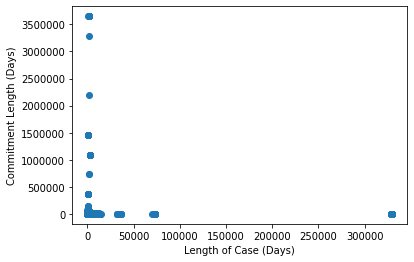

In [22]:
plt.scatter(df4.LENGTH_OF_CASE_in_Days, df4.COMMITMENT_DAYS)
plt.xlabel("Length of Case (Days)")
plt.ylabel("Commitment Length (Days)")
plt.show()

Okay, so both of these variables have some extreme values. For example, it looks like there were a few cases that lasted over 10 years, and there are some commitment terms of about 100 life terms. We can first build a model without modifying these, but if the model performs poorly we can make adjustments from there.

In [23]:
df4[df4.COMMITMENT_DAYS > 3500000]

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
30771,False,Original Sentencing,100,Natural Life,Finding Guilty,District 1 - Chicago,933.0,45.0,Male,Black,Sex Crimes,CHICAGO PD,True,Aggravated Battery With A Firearm,2,3650000.0
110150,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,4,3650000.0
110151,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,12,3650000.0
110152,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,16,3650000.0
110153,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,20,3650000.0
110154,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,28,3650000.0
110155,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,32,3650000.0
110156,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,40,3650000.0


In [24]:
df4[df4.LENGTH_OF_CASE_in_Days > 300000]

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
40400,True,Original Sentencing,2,Year(s),Plea Of Guilty,District 6 - Markham,329152.0,49.0,Female,Black,Retail Theft,HOMEWOOD PD,True,Retail Theft,1,730.0
76281,False,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,2,3650.0
76282,False,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,3,3650.0
76283,False,Original Sentencing,8,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,5,2920.0
76284,False,Original Sentencing,8,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,7,2920.0
76285,False,Original Sentencing,4,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,51,1460.0
76286,False,Original Sentencing,2,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,59,730.0
76287,True,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,1,3650.0
76581,True,Original Sentencing,5,Year(s),Plea Of Guilty,District 6 - Markham,329190.0,23.0,Male,Black,Aggravated Discharge Firearm,MARKHAM PD,True,Aggravated Discharge Firearm,1,1825.0
98220,False,Original Sentencing,3,Year(s),Finding Guilty,District 1 - Chicago,329374.0,25.0,Male,White,Sex Crimes,CHICAGO PD,True,Sex Crimes,3,1095.0


It looks as though something was duplicated multiple times. The number of charges is different, but this is likely because the case was continually reentered as the number of crimes increased. We can remove items 110150-110155, keeping 110156. It looks like something similar happened in a couple cases regarding the length of days. We can follow the same process, where we drop the duplicates with lower charge counts.

In [25]:
df4.iloc[110150]

PRIMARY_CHARGE                              True
SENTENCE_PHASE               Original Sentencing
COMMITMENT_TERM                               18
COMMITMENT_UNIT                           Months
CHARGE_DISPOSITION                Plea Of Guilty
COURT_NAME                  District 1 - Chicago
LENGTH_OF_CASE_in_Days                        56
AGE_AT_INCIDENT                               21
GENDER                                      Male
RACE                                       Black
OFFENSE_TYPE                           Narcotics
LAW_ENFORCEMENT_AGENCY                CHICAGO PD
CURRENT_SENTENCE                            True
UPDATED_OFFENSE_CATEGORY               Narcotics
CHARGE_COUNT                                   1
COMMITMENT_DAYS                              540
Name: 129197, dtype: object

It looks like the column names shown on the left-hand side of the dataframe do not correspond to the indeces for the dataframe, so we will have to find a way around that.

In [26]:
df4.index[df4.COMMITMENT_DAYS > 3500000].tolist()

[30771, 110150, 110151, 110152, 110153, 110154, 110155, 110156]

In [27]:
df4.reset_index(inplace=True, drop=True)

df4.index[df4.COMMITMENT_DAYS > 3500000].tolist()

[20384, 92565, 92566, 92567, 92568, 92569, 92570, 92571]

In [28]:
df4.iloc[92565]

PRIMARY_CHARGE                             False
SENTENCE_PHASE               Original Sentencing
COMMITMENT_TERM                              100
COMMITMENT_UNIT                     Natural Life
CHARGE_DISPOSITION                Verdict Guilty
COURT_NAME                  District 6 - Markham
LENGTH_OF_CASE_in_Days                      1875
AGE_AT_INCIDENT                               25
GENDER                                      Male
RACE                                       Black
OFFENSE_TYPE                            Homicide
LAW_ENFORCEMENT_AGENCY           CALUMET PARK PD
CURRENT_SENTENCE                            True
UPDATED_OFFENSE_CATEGORY                Homicide
CHARGE_COUNT                                   4
COMMITMENT_DAYS                         3.65e+06
Name: 92565, dtype: object

In [29]:
df4[df4.COMMITMENT_DAYS > 3500000]

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
20384,False,Original Sentencing,100,Natural Life,Finding Guilty,District 1 - Chicago,933.0,45.0,Male,Black,Sex Crimes,CHICAGO PD,True,Aggravated Battery With A Firearm,2,3650000.0
92565,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,4,3650000.0
92566,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,12,3650000.0
92567,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,16,3650000.0
92568,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,20,3650000.0
92569,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,28,3650000.0
92570,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,32,3650000.0
92571,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,40,3650000.0


In [30]:
df4 = df4.drop(df.index[[92566, 92567, 92568, 92569]])
df4[df4.COMMITMENT_DAYS > 3500000]

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
20384,False,Original Sentencing,100,Natural Life,Finding Guilty,District 1 - Chicago,933.0,45.0,Male,Black,Sex Crimes,CHICAGO PD,True,Aggravated Battery With A Firearm,2,3650000.0
92565,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,4,3650000.0
92570,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,32,3650000.0
92571,False,Original Sentencing,100,Natural Life,Verdict Guilty,District 6 - Markham,1875.0,25.0,Male,Black,Homicide,CALUMET PARK PD,True,Homicide,40,3650000.0


In [31]:
df4.reset_index(inplace=True, drop=True)
df4[df4.LENGTH_OF_CASE_in_Days > 300000]

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
28954,True,Original Sentencing,2,Year(s),Plea Of Guilty,District 6 - Markham,329152.0,49.0,Female,Black,Retail Theft,HOMEWOOD PD,True,Retail Theft,1,730.0
61609,False,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,2,3650.0
61610,False,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,3,3650.0
61611,False,Original Sentencing,8,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,5,2920.0
61612,False,Original Sentencing,8,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,7,2920.0
61613,False,Original Sentencing,4,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,51,1460.0
61614,False,Original Sentencing,2,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,59,730.0
61615,True,Original Sentencing,10,Year(s),Finding Guilty,District 1 - Chicago,329379.0,34.0,Male,White,Sex Crimes,CHICAGO PD,True,Home Invasion,1,3650.0
61890,True,Original Sentencing,5,Year(s),Plea Of Guilty,District 6 - Markham,329190.0,23.0,Male,Black,Aggravated Discharge Firearm,MARKHAM PD,True,Aggravated Discharge Firearm,1,1825.0
81534,False,Original Sentencing,3,Year(s),Finding Guilty,District 1 - Chicago,329374.0,25.0,Male,White,Sex Crimes,CHICAGO PD,True,Sex Crimes,3,1095.0


In [32]:
df4.index[df4.LENGTH_OF_CASE_in_Days > 300000].tolist()

[28954,
 61609,
 61610,
 61611,
 61612,
 61613,
 61614,
 61615,
 61890,
 81534,
 81535,
 95216,
 103798,
 144102,
 144103,
 186381]

On further investigation, it appears that the duplicates are actually secondary charges that were applied to each case. However, this muddies the data, due to the way it is presented. That is, the charge listed remains the same, but the commitment term changes. For our model, we will drop secondary charges from our analysis.

In [33]:
df5 = df4[df4.PRIMARY_CHARGE==True]

In [34]:
df5.reset_index(inplace=True, drop=True)
df5

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,OFFENSE_TYPE,LAW_ENFORCEMENT_AGENCY,CURRENT_SENTENCE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,COMMITMENT_DAYS
0,True,Amended/Corrected Sentencing,62,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,PROMIS Conversion,CHICAGO POLICE DEPT,True,Homicide,1,22630.0
1,True,Amended/Corrected Sentencing,45,Year(s),Verdict Guilty,District 6 - Markham,3760.0,23.0,Male,Black,PROMIS Conversion,COOK CO SHERIFF OFF,True,Domestic Battery,1,16425.0
2,True,Original Sentencing,55,Year(s),Verdict Guilty,District 6 - Markham,1177.0,23.0,Male,Black,PROMIS Conversion,COOK CO SHERIFF OFF,False,Domestic Battery,1,20075.0
3,True,Original Sentencing,18,Months,Plea Of Guilty,District 5 - Bridgeview,15.0,39.0,Female,Black,PROMIS Conversion,C P D AREA 2 DIST 5,True,Narcotics,1,540.0
4,True,Original Sentencing,3,Year(s),Plea Of Guilty,District 5 - Bridgeview,4970.0,24.0,Male,White,PROMIS Conversion,ISP DISTRICT 04,True,PROMIS Conversion,1,1095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145908,True,Original Sentencing,2,Year(s),Finding Guilty,District 1 - Chicago,0.0,30.0,Male,Black,Aggravated Battery Police Officer,CHICAGO PD,True,Aggravated Battery Police Officer,1,730.0
145909,True,Original Sentencing,41,Days,Plea Of Guilty,District 1 - Chicago,0.0,63.0,Male,Black,Burglary,CHICAGO PD,True,Possession Of Burglary Tools,1,41.0
145910,True,Original Sentencing,18,Months,Plea Of Guilty,District 4 - Maywood,0.0,28.0,Male,White,Other Offense,OAK PARK PD,True,Other Offense,1,540.0
145911,True,Original Sentencing,24,Months,Plea Of Guilty,District 6 - Markham,3.0,26.0,Male,White,Narcotics,LANSING PD,True,Narcotics,1,720.0


In [35]:
df5 = pd.concat([df5, pd.get_dummies(df5.SENTENCE_PHASE, drop_first=True)], axis=1)

In [36]:
df5 = pd.concat([df5, pd.get_dummies(df5.CHARGE_DISPOSITION, drop_first=True)], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5.COURT_NAME, drop_first=True)], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5.GENDER, drop_first=True)], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5.RACE, drop_first=True)], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5.UPDATED_OFFENSE_CATEGORY, drop_first=True)], axis=1)
df5

,PRIMARY_CHARGE,SENTENCE_PHASE,COMMITMENT_TERM,COMMITMENT_UNIT,CHARGE_DISPOSITION,COURT_NAME,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,...,Stalking,Theft,Theft by Deception,UUW - Unlawful Use of Weapon,Unlawful Restraint,Vehicular Hijacking,Vehicular Invasion,Violate Bail Bond,Violation Order Of Protection,Violation of Sex Offender Registration
0,True,Amended/Corrected Sentencing,62,Year(s),Plea Of Guilty,District 6 - Markham,10982.0,27.0,Male,Black,...,0,0,0,0,0,0,0,0,0,0
1,True,Amended/Corrected Sentencing,45,Year(s),Verdict Guilty,District 6 - Markham,3760.0,23.0,Male,Black,...,0,0,0,0,0,0,0,0,0,0
2,True,Original Sentencing,55,Year(s),Verdict Guilty,District 6 - Markham,1177.0,23.0,Male,Black,...,0,0,0,0,0,0,0,0,0,0
3,True,Original Sentencing,18,Months,Plea Of Guilty,District 5 - Bridgeview,15.0,39.0,Female,Black,...,0,0,0,0,0,0,0,0,0,0
4,True,Original Sentencing,3,Year(s),Plea Of Guilty,District 5 - Bridgeview,4970.0,24.0,Male,White,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145908,True,Original Sentencing,2,Year(s),Finding Guilty,District 1 - Chicago,0.0,30.0,Male,Black,...,0,0,0,0,0,0,0,0,0,0
145909,True,Original Sentencing,41,Days,Plea Of Guilty,District 1 - Chicago,0.0,63.0,Male,Black,...,0,0,0,0,0,0,0,0,0,0
145910,True,Original Sentencing,18,Months,Plea Of Guilty,District 4 - Maywood,0.0,28.0,Male,White,...,0,0,0,0,0,0,0,0,0,0
145911,True,Original Sentencing,24,Months,Plea Of Guilty,District 6 - Markham,3.0,26.0,Male,White,...,0,0,0,0,0,0,0,0,0,0


## Modeling

In [37]:
df5.CHARGE_COUNT = df5.CHARGE_COUNT.astype('float')

About 80,000 rows were dropped. Not only will this eliminate biases from duplicate data in the dataset, it also significatly cleans up the dataset without having to go through and manually remove duplicates like we did above. Now we can continue with our investigation. We can start with a linear regression model and try to refine it before moving on to another model.

In [38]:
y = df5['COMMITMENT_DAYS']
X = df5.drop(['PRIMARY_CHARGE', 'SENTENCE_PHASE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'CHARGE_DISPOSITION', 'COURT_NAME', 'GENDER', 'RACE', 'OFFENSE_TYPE', 'LAW_ENFORCEMENT_AGENCY', 
             'CURRENT_SENTENCE', 'UPDATED_OFFENSE_CATEGORY'], axis=1)

In [39]:
X = X.drop('COMMITMENT_DAYS', axis=1)


In [40]:
X

,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,CHARGE_COUNT,Original Sentencing,Probation Violation Sentencing,Remanded Sentencing,Resentenced,Summary Charge Info,Case Dismissed,Charge Vacated,...,Stalking,Theft,Theft by Deception,UUW - Unlawful Use of Weapon,Unlawful Restraint,Vehicular Hijacking,Vehicular Invasion,Violate Bail Bond,Violation Order Of Protection,Violation of Sex Offender Registration
0,10982.0,27.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3760.0,23.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1177.0,23.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,39.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4970.0,24.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145908,0.0,30.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145909,0.0,63.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145910,0.0,28.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145911,3.0,26.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1995)


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145913 entries, 0 to 145912
Columns: 117 entries, LENGTH_OF_CASE_in_Days to Violation of Sex Offender Registration
dtypes: float64(3), uint8(114)
memory usage: 19.2 MB


In [64]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        COMMITMENT_DAYS   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     44.07
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:09:23   Log-Likelihood:            -1.1702e+06
No. Observations:              116730   AIC:                         2.341e+06
Df Residuals:                  116615   BIC:                         2.342e+06
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [65]:
y_preds = results.predict(X_test)

print("Mean absolute error: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error: {}".format(mse(y_test, y_preds)))
print("Root mean squared error: {}".format(rmse(y_test, y_preds)))

Mean absolute error: 511.0718317200382
Mean squared error: 1204239.58688441
Root mean squared error: 1097.3785066623138


Our initial linear model fit very poorly. While the results were statistically significant, it had an R-squared value of only 0.041. Since there are a very large number of features, it may be of benefit to perform PCA before running the model.

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1995)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=25)
components = pca.fit_transform(X_train)
components_test = pca.transform(X_test)

In [46]:
pca.explained_variance_ratio_

array([0.02024342, 0.0177631 , 0.01672946, 0.01359253, 0.01191129,
       0.01086534, 0.01017152, 0.00990886, 0.0096386 , 0.00945274,
       0.00918578, 0.00907947, 0.00906371, 0.00905536, 0.00898842,
       0.00897698, 0.00890459, 0.00890348, 0.00887986, 0.00886713,
       0.00886295, 0.00884149, 0.0088279 , 0.00879352, 0.00878536])

It doesn't seem like the PCA components adequately explain the variance in the data, but we can still fit a linear regression model to see what would happen.

In [47]:
components = sm.add_constant(components)
components_test = sm.add_constant(components_test)
results = sm.OLS(y_train, components).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        COMMITMENT_DAYS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     113.1
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:23:10   Log-Likelihood:            -1.1712e+06
No. Observations:              116730   AIC:                         2.343e+06
Df Residuals:                  116704   BIC:                         2.343e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1103.2601     16.138     68.364      0.0

In [49]:
y_preds = results.predict(components_test)

print("Mean absolute error: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error: {}".format(mse(y_test, y_preds)))
print("Root mean squared error: {}".format(rmse(y_test, y_preds)))

Mean absolute error: 656.8364623159567
Mean squared error: 1564070.1008214545
Root mean squared error: 1250.627882633941


As we can see above, the linear model actually performed worse after performing PCA on the dataset. This may likely be due to the large number of dummy variables. However, having the MSE, RMSE, and MAE will be good for comparing the performance of the other models we will build. Next, we can try running a random forest model.

In [50]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1995)
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

rcf = ensemble.RandomForestRegressor()

In [52]:
rcf_results = rcf.fit(X_train, y_train_encoded)

In [53]:
rcf_preds = rcf.predict(X_test)

In [54]:
print("Mean absolute error: {}".format(mean_absolute_error(y_test_encoded, rcf_preds)))
print("Mean squared error: {}".format(mse(y_test_encoded, rcf_preds)))
print("Root mean squared error: {}".format(rmse(y_test_encoded, rcf_preds)))

Mean absolute error: 126.08796502512513
Mean squared error: 17345.483135854276
Root mean squared error: 131.70225182529825


In [55]:
rcf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

The default random forest model did significantly better than the linear model did, with MSE an order of magnitude better; MAE also shrunk down to less than 20% of what it was in the linear model. Let's try to tweak the model to get even better performance.

In [56]:
rcf2 = ensemble.RandomForestRegressor(n_estimators=200, max_depth=100)
rcf2_results = rcf2.fit(X_train, y_train_encoded)
rcf2_preds = rcf2.predict(X_test)

In [57]:
print("Mean absolute error: {}".format(mean_absolute_error(y_test_encoded, rcf2_preds)))
print("Mean squared error: {}".format(mse(y_test_encoded, rcf2_preds)))
print("Root mean squared error: {}".format(rmse(y_test_encoded, rcf2_preds)))

Mean absolute error: 125.70973024571518
Mean squared error: 17128.88413741062
Root mean squared error: 130.87736296782046


The second random forest model did better still than the first random forest model, but only marginally. In fact, the improvements made may well be due to random chance. The increased time required to run the second model was not worth the added performance in this case, as the second model took nearly three times as long as the first to run. In the context of jail terms, an MAE of 125.7 days is quite good; that is about a third of one year - a small amount of time considering that some sentences are over 3,500,000 days long. However, we can try another model just to see if there can be any further performance improvements.

In [58]:
from sklearn.svm import SVR

svr = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1995)


In [59]:
svr_results = svr.fit(X_train, y_train)

In [60]:
svr_preds = svr.predict(X_test)

In [61]:
print("Mean absolute error: {}".format(mean_absolute_error(y_test, svr_preds)))
print("Mean squared error: {}".format(mse(y_test, svr_preds)))
print("Root mean squared error: {}".format(rmse(y_test, svr_preds)))

Mean absolute error: 528.6932806867915
Mean squared error: 2122592.356152845
Root mean squared error: 1456.9119246381522


Right off the bat, the SVR took a very long time to run. Compared to the random forest regressor runtime of less than 5 minutes, the runtime for the SVR is unacceptable. Additionally, the model itself performed significantly worse than the random forest model model did. MSE was an order of magnitude worse, and MAE was over 4 times as high.

The dataset we are working with presents a unique challenge. For one thing, the models took a significant amount of time to run. We could undoubtedly have run a more complex or further tweaked random forest model but the runtime would likely have been atrocious. As it is, the model we ran took a long time, and the support vector machine even more so. The decision to stop the modeling procedures where we left it is mostly due to performance constraints. In a production setting it may be that the increased performance would dramatically lower the time required, but based on the limitations we have, it does not make sense to continue pushing. As it is, the random forest model produced significantly better results - an 80% improvement in the MAE and a full order of magnitude improvement in the RMSE. 

However, the data cleaning that was performed removed quite a bit of data. Most noticeable is the removal of punishments that were not sentencings (e.g. fines or community service). For further analysis it may be prudent to include these crimes. This would likely result in increased complexity of the model, with conditions based on the type of punishment given, but it would give more thorough results. 

While I would not feel completely comfortable putting this model into a production environment, it do believe it is the best we can achieve at this time.